# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
import warnings
warnings.filterwarnings(action="ignore")

In [1]:
# Import the libraries you will be using for analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [30]:
# Try loading one file

df = pd.read_parquet('/Users/jpalla/Downloads/EDA Assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/jpalla/Downloads/EDA Assignment/Datasets and Dictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        eachDF = pd.read_parquet(file_path)
        eachDF['tpep_pickup_datetime_date'] = eachDF.tpep_pickup_datetime.dt.date
        eachDF['tpep_pickup_datetime_hour'] = eachDF.tpep_pickup_datetime.dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for eachDate in eachDF.tpep_pickup_datetime_date.unique():
            dateFilteredDF = eachDF[eachDF.tpep_pickup_datetime_date == eachDate]
            for eachHour in range(0, 24):
                filteredDataFrame =  dateFilteredDF[dateFilteredDF.tpep_pickup_datetime_hour == eachHour]
                sampledDataFrame = filteredDataFrame.sample(frac = 0.05, random_state = 42)
                sampled_data = pd.concat([sampled_data, sampledDataFrame])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

    # concatenating for each file
    df = pd.concat([df, sampled_data])

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [45]:
# Store the df in csv/parquet
df.to_parquet('sampleddataset.parquet', engine="pyarrow")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [213]:
# Load the new data file
df = pd.read_parquet('/Users/jpalla/Downloads/EDA Assignment/Datasets and Dictionary/trip_records/sampleddataset.parquet')

In [214]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee  tpep_pickup_datetime_date  tpep_pickup_datetime_hour  \
1788             0.0                 2023-12-01                          0   
3196699          NaN                 2023-12-01                          0   
1408             0.0                 2023-12-01                          0   
3196663          NaN                 2023-12-01                          0   
3613             0.0                 2023-12-01                          0   

        airport_fee  
1788            NaN  
3196699         NaN  
1408            NaN  
3196663         NaN  
3613            NaN  

[5 rows x 22 columns]

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 1788 to 3202916
Data columns (total 22 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   VendorID                   int64         
 1   tpep_pickup_datetime       datetime64[us]
 2   tpep_dropoff_datetime      datetime64[us]
 3   passenger_count            float64       
 4   trip_distance              float64       
 5   RatecodeID                 float64       
 6   store_and_fwd_flag         object        
 7   PULocationID               int64         
 8   DOLocationID               int64         
 9   payment_type               int64         
 10  fare_amount                float64       
 11  extra                      float64       
 12  mta_tax                    float64       
 13  tip_amount                 float64       
 14  tolls_amount               float64       
 15  improvement_surcharge      float64       
 16  total_amount               float64    

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [216]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace=True,drop=True)

In [217]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4         2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.99         1.0                  N           148            50   
1           4.79         NaN               None           231            61   
2           1.05         1.0                  N           161           161   
3           2.08         NaN               None           137           144   
4           0.40         1.0                  N            68            68   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        5.66           0.0   
1             0  ...      0.5        3.00           0.0   
2             1  ...      0.5        3.14           0.0   
3             0  ...      0.5        0.00           0.0   
4             1  ...      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         33.96                   2.5          0.0   
1                    1.0         29.43                   NaN          NaN   
2                    1.0         18.84                   2.5          0.0   
3                    1.0         21.22                   NaN          NaN   
4                    1.0         10.10                   2.5          0.0   

   tpep_pickup_datetime_date  tpep_pickup_datetime_hour airport_fee  
0                 2023-12-01                          0         NaN  
1                 2023-12-01                          0         NaN  
2                 2023-12-01                          0         NaN  
3                 2023-12-01                          0         NaN  
4                 2023-12-01                          0         NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [218]:
# Combine the two airport fee columns
def compareFunc(x, y):
    if (pd.isna(x)):
        return y
    else:
        return x
df['airport_fee_new'] = df[['Airport_fee','airport_fee']].apply(lambda x: compareFunc(*x), axis=1)

In [220]:
df = df.drop(columns=['airport_fee', 'Airport_fee'])
df.info()

KeyError: "['airport_fee', 'Airport_fee'] not found in axis"

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [221]:
# check where values of fare amount are negative
df[df.fare_amount < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_datetime_date, tpep_pickup_datetime_hour, airport_fee_new]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [222]:
# Analyse RatecodeID for the negative fare amounts
# since none of the rows have negative fare amounts, checking unique values of RateCodeID
df.RatecodeID.value_counts()

# found values where RateCodeID = 99

RatecodeID
1.0     1729259
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

In [223]:
# Find which columns have negative values
# columns with negative values - extra, mta_tax, improvement_surcharge, total_amount, congestion_surcharge, airport_fee_new

# after noticing values in the column extra which has negative values, looks like the trip distance is very less which could be considered as junk data and dropped
df = df[df.trip_distance > 0.1]

In [224]:
# fix these negative values
df[df.extra < 0] # returns no negative values

# as mta_tax standard is 0.5, negative values can be assumed to be a mistake and the standard value 0.5 can be taken instead
df.mta_tax = df.mta_tax.apply(lambda x : 0.5 if x < 0 else x)

In [225]:
# same rule that applies for mta_tax applies for improvement surcharge
df.improvement_surcharge = df.improvement_surcharge.apply(lambda x : 0.3 if x < 0 else x)

In [226]:
# for total amount specifically, it cannot be 0, ideal way would be to calculate total amount with the available data
# since the rules to calculate this are not available with us and since the volume of rows with 0 or negative amount is less i.e., 124 rows only, we can drop these
df[df.total_amount <= 0]

df = df[df.total_amount > 0]

In [227]:
# congestion surcharge had negative values which are automatically handled by managing the above dropped rows i.e., total amount = 0 & trip distance > 0.1
df[df.congestion_surcharge < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_datetime_date, tpep_pickup_datetime_hour, airport_fee_new]
Index: []

[0 rows x 21 columns]

In [228]:
# same as congestion charge for airport_fee_new
df[df.airport_fee_new < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_datetime_date, tpep_pickup_datetime_hour, airport_fee_new]
Index: []

[0 rows x 21 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [838]:
# Find the proportion of missing values in each column
totalRows = df.shape[0]
for each in df.columns:
    print('Column ', each, ' - ', (totalRows - df[each].count())/totalRows)

Column  VendorID  -  0.0
Column  tpep_pickup_datetime  -  0.0
Column  tpep_dropoff_datetime  -  0.0
Column  passenger_count  -  0.0
Column  trip_distance  -  0.0
Column  RatecodeID  -  0.0
Column  store_and_fwd_flag  -  0.0
Column  PULocationID  -  0.0
Column  DOLocationID  -  0.0
Column  payment_type  -  0.0
Column  fare_amount  -  0.0
Column  extra  -  0.0
Column  mta_tax  -  0.0
Column  tip_amount  -  0.0
Column  tolls_amount  -  0.0
Column  improvement_surcharge  -  0.0
Column  total_amount  -  0.0
Column  congestion_surcharge  -  0.0
Column  tpep_pickup_datetime_date  -  0.0
Column  tpep_pickup_datetime_hour  -  0.0
Column  airport_fee_new  -  0.0
Column  tpep_pickup_dayOfWeek  -  0.0
Column  tpep_pickup_datetime_month  -  0.0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [813]:
# Display the rows with null values
df[pd.isna(df.passenger_count)]

# Impute NaN values in 'passenger_count'
# getting the median value - we'll use this to replace the null values in passenger_count
df.passenger_count.describe()

count    1.792645e+06
mean     1.388114e+00
std      8.793876e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [814]:
df.passenger_count = df.passenger_count.apply(lambda x : 1 if pd.isna(x) else x)

Did you find zeroes in passenger_count? Handle these.

In [815]:
df.passenger_count.value_counts()

passenger_count
1.0    1374059
2.0     273578
3.0      68064
4.0      37486
5.0      23704
6.0      15754
Name: count, dtype: int64

In [816]:
df.passenger_count = df.passenger_count.apply(lambda x : 1 if x == 0 else x)

In [817]:
df.passenger_count.value_counts()

passenger_count
1.0    1374059
2.0     273578
3.0      68064
4.0      37486
5.0      23704
6.0      15754
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [818]:
# Fix missing values in 'RatecodeID'
df[pd.isna(df.RatecodeID)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, tpep_pickup_datetime_date, tpep_pickup_datetime_hour, airport_fee_new, tpep_pickup_dayOfWeek, tpep_pickup_datetime_month]
Index: []

[0 rows x 23 columns]

In [819]:
# setting this to standard rate wherever it is blank
df.RatecodeID = df.RatecodeID.apply(lambda x : 1 if pd.isna(x) else x)

In [820]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1792645 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   VendorID                    1792645 non-null  int64         
 1   tpep_pickup_datetime        1792645 non-null  datetime64[us]
 2   tpep_dropoff_datetime       1792645 non-null  datetime64[us]
 3   passenger_count             1792645 non-null  float64       
 4   trip_distance               1792645 non-null  float64       
 5   RatecodeID                  1792645 non-null  float64       
 6   store_and_fwd_flag          1792645 non-null  object        
 7   PULocationID                1792645 non-null  int64         
 8   DOLocationID                1792645 non-null  int64         
 9   payment_type                1792645 non-null  int64         
 10  fare_amount                 1792645 non-null  float64       
 11  extra                       1

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [821]:
# handle null values in congestion_surcharge
df.congestion_surcharge.describe()

count    1.792645e+06
mean     2.337641e+00
std      6.160655e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

In [822]:
df.congestion_surcharge.value_counts()

congestion_surcharge
2.5    1676224
0.0     116420
0.5          1
Name: count, dtype: int64

In [823]:
df.congestion_surcharge = df.congestion_surcharge.apply(lambda x : 2.5 if pd.isna(x) else x)

In [824]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1792645 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   VendorID                    1792645 non-null  int64         
 1   tpep_pickup_datetime        1792645 non-null  datetime64[us]
 2   tpep_dropoff_datetime       1792645 non-null  datetime64[us]
 3   passenger_count             1792645 non-null  float64       
 4   trip_distance               1792645 non-null  float64       
 5   RatecodeID                  1792645 non-null  float64       
 6   store_and_fwd_flag          1792645 non-null  object        
 7   PULocationID                1792645 non-null  int64         
 8   DOLocationID                1792645 non-null  int64         
 9   payment_type                1792645 non-null  int64         
 10  fare_amount                 1792645 non-null  float64       
 11  extra                       1

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [825]:
# Handle any remaining missing values
df.airport_fee_new.describe()

count    1.792645e+06
mean     1.432561e-01
std      4.653434e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: airport_fee_new, dtype: float64

In [826]:
df.airport_fee_new = df.airport_fee_new.apply(lambda x : 0 if pd.isna(x) else x)

In [827]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    1781910
Y      10735
Name: count, dtype: int64

In [828]:
df.store_and_fwd_flag = df.store_and_fwd_flag.apply(lambda x : 'N' if pd.isna(x) else x)

In [829]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1792645 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   VendorID                    1792645 non-null  int64         
 1   tpep_pickup_datetime        1792645 non-null  datetime64[us]
 2   tpep_dropoff_datetime       1792645 non-null  datetime64[us]
 3   passenger_count             1792645 non-null  float64       
 4   trip_distance               1792645 non-null  float64       
 5   RatecodeID                  1792645 non-null  float64       
 6   store_and_fwd_flag          1792645 non-null  object        
 7   PULocationID                1792645 non-null  int64         
 8   DOLocationID                1792645 non-null  int64         
 9   payment_type                1792645 non-null  int64         
 10  fare_amount                 1792645 non-null  float64       
 11  extra                       1

In [830]:
df.RatecodeID.value_counts()

RatecodeID
1.0    1710478
2.0      68994
3.0       5656
5.0       3934
4.0       3582
6.0          1
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [255]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.852528e+06                     1852528                     1852528   
mean   1.739806e+00  2023-07-02 03:40:28.270854  2023-07-02 03:58:02.577125   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 00:46:54.750000  2023-04-02 00:59:58.250000   
50%    2.000000e+00         2023-06-26 11:36:35  2023-06-26 11:55:46.500000   
75%    2.000000e+00  2023-10-06 00:39:48.250000  2023-10-06 00:55:58.500000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.441694e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.852528e+06   1.852528e+06  1.852528e+06  1.852528e+06   
mean      1.375708e+00   3.949097e+00  1.547691e+00  1.653794e+02   
min       1.000000e+00   1.100000e-01  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.100000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.820000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.490000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.679667e-01   1.309305e+02  6.911430e+00  6.386298e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.852528e+06  1.852528e+06  1.852528e+06  1.852528e+06  1.852528e+06   
mean   1.640862e+02  1.164128e+00  1.979685e+01  1.610634e+00  4.969846e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  1.425000e+01  4.000000e+00   
std    6.978139e+01  4.846265e-01  1.066655e+02  1.832938e+00  3.905609e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.852528e+06  1.852528e+06           1.852528e+06  1.852528e+06   
mean   3.583708e+00  5.991740e-01           9.995011e-01  2.893139e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  1.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.600000e+01   
50%    2.880000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.480000e+00  0.000000e+00           1.000000e+00  3.080000e+01   
max    2.230800e+02  9.500000e+01           1.000000e+00  1.431675e+05   
std    3.988015e+00  2.182066e+00           1.890482e-02  1.075359e+02   

       congestion_surcharge  tpep_pickup_datetime_hour  airport_fee_new  
count          1.852528e+06               1.852528e+06     1.852528e+06  
mean           2.329926e+00               1.428184e+01     1.388207e-01  
min            0.000000e+00               0.000000e+00     0.000000e+00  
25%            2.500000e+00               1.100000e+01     0.000000e+00  
50%            2.500000e+00               1.500000e+01     0.000000e+00  
75%            2.500000e+00               1.900000e+01     0.000000e+00  
max            2.500000e+00               2.300000e+01     1.750000e+00  
std            6.294916e-01               5.792136e+00     4.587605e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [257]:
# remove passenger_count > 6
df.passenger_count.value_counts()
df = df[df.passenger_count <= 6]

In [259]:
# Continue with outlier handling
df.VendorID.value_counts()

df = df[df.VendorID != 6]

In [263]:
df.trip_distance.describe()

count    1.852075e+06
mean     3.947621e+00
std      1.309465e+02
min      1.100000e-01
25%      1.100000e+00
50%      1.820000e+00
75%      3.490000e+00
max      1.263605e+05
Name: trip_distance, dtype: float64

In [272]:
df = df[df.trip_distance <= 250]

In [277]:
df = df[(df.fare_amount > 0) & (df.fare_amount <= 300)]

In [ ]:
# Do any columns need standardising?
# Yes - RateCodeID etc. need standardizing. Following code blocks clean up those values as well

In [280]:
df.RatecodeID.value_counts()

RatecodeID
1.0     1760204
2.0       69033
99.0       9249
3.0        5670
5.0        3975
4.0        3616
6.0           1
Name: count, dtype: int64

In [281]:
df = df[df.RatecodeID != 99]

In [282]:
df.RatecodeID.value_counts()

RatecodeID
1.0    1760204
2.0      69033
3.0       5670
5.0       3975
4.0       3616
6.0          1
Name: count, dtype: int64

In [283]:
df.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    1831763
Y      10736
Name: count, dtype: int64

In [284]:
df.payment_type.value_counts()

payment_type
1    1468052
2     307298
0      49574
4      11356
3       6219
Name: count, dtype: int64

In [285]:
df = df[df.payment_type != 0] 

In [302]:
df = df[df.tip_amount <= 50]

In [286]:
df.payment_type.value_counts()

payment_type
1    1468052
2     307298
4      11356
3       6219
Name: count, dtype: int64

In [311]:
df = df[df.tolls_amount <= 50]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [316]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_datetime_date',
 'tpep_pickup_datetime_hour',
 'airport_fee_new']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: xlabel='tpep_pickup_datetime_hour'>

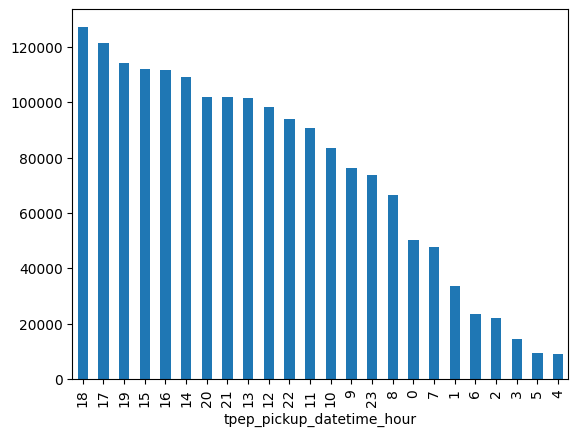

In [318]:
# Find and show the hourly trends in taxi pickups
df.tpep_pickup_datetime_hour.value_counts().plot.bar()

In [ ]:
# this method sets this to day of the week from integers 0 to 6 where
# 0 - Monday
# 1 - Tuesday
# 2 - Wednesday
# 3 - Thursday
# 4 - Friday
# 5 - Saturday
# 6 - Sunday
df['tpep_pickup_dayOfWeek'] = df.tpep_pickup_datetime.apply(lambda x: x.weekday())

<Axes: xlabel='tpep_pickup_dayOfWeek'>

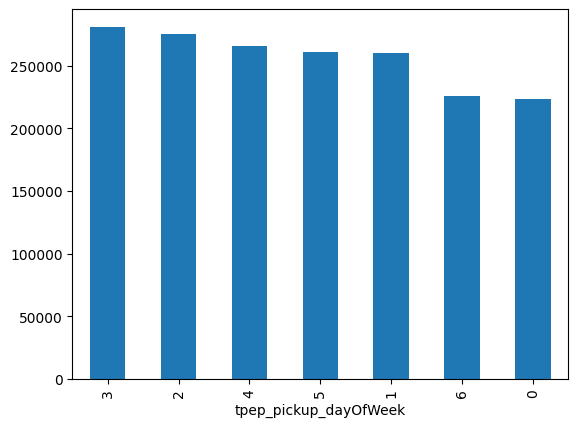

In [321]:
# Find and show the daily trends in taxi pickups (days of the week)
df.tpep_pickup_dayOfWeek.value_counts().plot.bar()

In [ ]:
df['tpep_pickup_datetime_month'] = df.tpep_pickup_datetime.dt.month

<Axes: xlabel='tpep_pickup_datetime_month'>

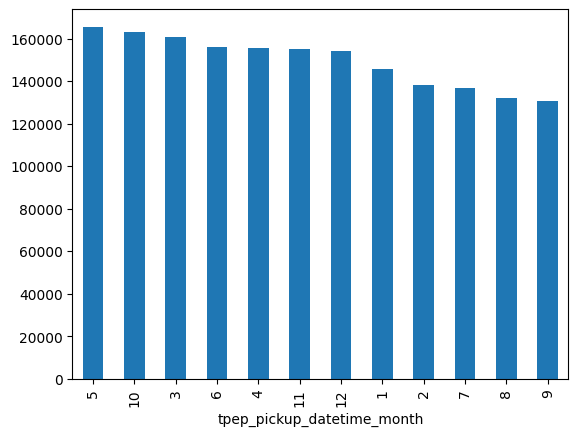

In [ ]:
# Show the monthly trends in pickups
df.tpep_pickup_datetime_month.value_counts().plot.bar()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [336]:
# Analyse the above parameters
df[(df.trip_distance <= 0) | (df.fare_amount <= 0) | (df.tip_amount <= 0) | (df.total_amount <= 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
20              2  2023-12-01 00:18:11   2023-12-01 00:28:26              1.0   
21              2  2023-12-01 00:22:45   2023-12-01 00:31:27              1.0   
22              1  2023-12-01 00:00:47   2023-12-01 00:01:59              1.0   
28              1  2023-12-01 00:26:33   2023-12-01 00:47:11              1.0   
...           ...                  ...                   ...              ...   
1896363         1  2023-06-30 23:56:48   2023-07-01 00:19:30              4.0   
1896375         2  2023-06-30 23:36:40   2023-06-30 23:42:35              1.0   
1896388         1  2023-06-30 23:28:28   2023-06-30 23:39:33              1.0   
1896393         2  2023-06-30 23:11:55   2023-06-30 23:29:09              1.0   
1896398         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4                 0.40         1.0                  N            68   
20                0.99         1.0                  N           264   
21                1.29         1.0                  N            79   
22                0.20         1.0                  N           238   
28                3.40         1.0                  N           233   
...                ...         ...                ...           ...   
1896363           5.00         1.0                  N            65   
1896375           0.82         1.0                  N            79   
1896388           1.70         1.0                  N           234   
1896393           1.78         1.0                  N            41   
1896398           1.00         1.0                  N            87   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
4                  68             1  ...         0.0           0.0   
20                264             2  ...         0.0           0.0   
21                231             2  ...         0.0           0.0   
22                238             4  ...         0.0           0.0   
28                238             2  ...         0.0           0.0   
...               ...           ...  ...         ...           ...   
1896363           164             2  ...         0.0           0.0   
1896375           113             2  ...         0.0           0.0   
1896388           100             2  ...         0.0           0.0   
1896393           226             2  ...         0.0           0.0   
1896398           231             2  ...         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0          10.1                   2.5   
20                         1.0          13.2                   0.0   
21                         1.0          15.0                   2.5   
22                         1.0           8.7                   2.5   
28                         1.0          24.8                   2.5   
...                        ...           ...                   ...   
1896363                    1.0          29.0                   2.5   
1896375                    1.0          12.2                   2.5   
1896388                    1.0          17.1                   2.5   
1896393                    1.0          18.8                   0.0   
1896398                    1.0          15.7                   2.5   

         tpep_pickup_datetime_date  tpep_pickup_datetime_hour  \
4                       2023-12-01                          0   
20                      2023-12-01                          0   
21                      2023-12-01                          0   
22                      2023-12-01                          0   
28                      2023-12-01                          0   
...                            ...                        ...   
1896363                 2023-06-30            

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [337]:
# Create a df with non zero entries for the selected parameters.
dfNonZero = df[~((df.trip_distance <= 0) | (df.fare_amount <= 0) | (df.tip_amount <= 0) | (df.total_amount <= 0))]

In [382]:
dfNonZero.shape

(1411022, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<Axes: xlabel='tpep_pickup_datetime_month'>

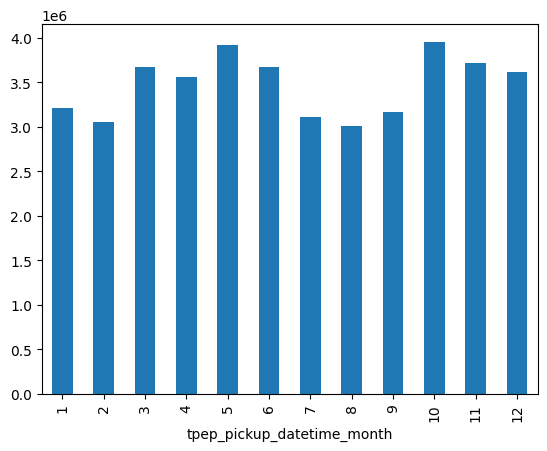

In [ ]:
# Group data by month and analyse monthly revenue
dfNonZero.groupby(['tpep_pickup_datetime_month'])['total_amount'].sum().plot.bar()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [362]:
# Calculate proportion of each quarter
revenueAllMonths = dfNonZero.groupby(['tpep_pickup_datetime_month'])['total_amount'].sum()
revenueByQuarter = {"Q1" : revenueAllMonths.iloc[0:3].sum(), "Q2": revenueAllMonths.iloc[3:6].sum(), "Q3": revenueAllMonths.iloc[6:9].sum(), "Q4": revenueAllMonths.iloc[9:12].sum()}
qWiseProp = dict(map(lambda a : (a[0], round(a[1] * 100/revenueAllMonths.sum(), 2)), revenueByQuarter.items()))
qWiseProp

{'Q1': np.float64(23.86),
 'Q2': np.float64(26.76),
 'Q3': np.float64(22.29),
 'Q4': np.float64(27.09)}

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

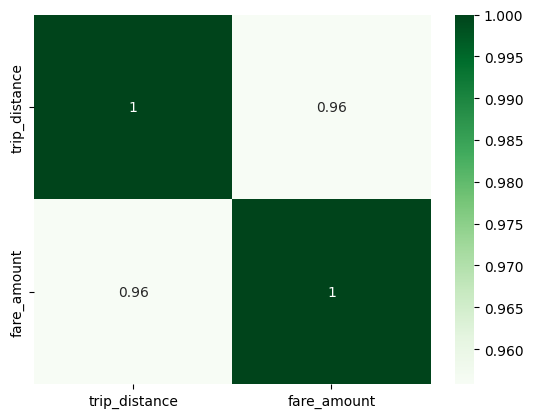

In [373]:
# Show how trip fare is affected by distance
corrDF = dfNonZero[['trip_distance', 'fare_amount']]
dfCorr = corrDF.corr()
sns.heatmap(dfCorr, cmap="Greens", annot=True)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

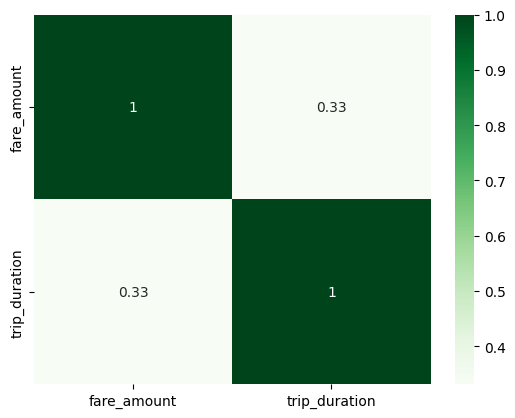

In [390]:
# Show relationship between fare and trip duration
from datetime import datetime

# find difference between 2 datetime variables
def returnDiff(x, y):
    return (x - y).total_seconds()

dfNonZero['trip_duration'] = dfNonZero[['tpep_dropoff_datetime', 'tpep_pickup_datetime']].apply(lambda x : returnDiff(*x), axis=1)
corrDF1 = dfNonZero[['fare_amount', 'trip_duration']]
dfCorr1 = corrDF1.corr()
sns.heatmap(dfCorr1, cmap="Greens", annot=True)
plt.show()

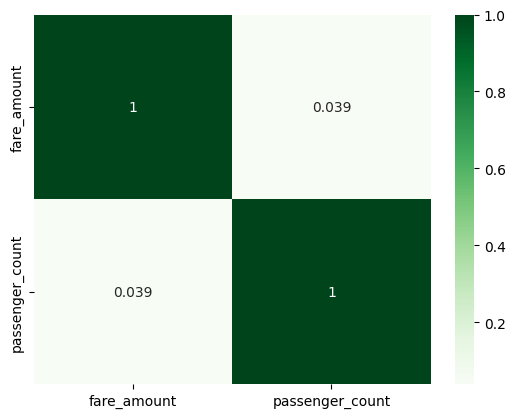

In [375]:
# Show relationship between fare and number of passengers
corrDF2 = dfNonZero[['fare_amount', 'passenger_count']]
dfCorr2 = corrDF2.corr()
sns.heatmap(dfCorr2, cmap="Greens", annot=True)
plt.show()

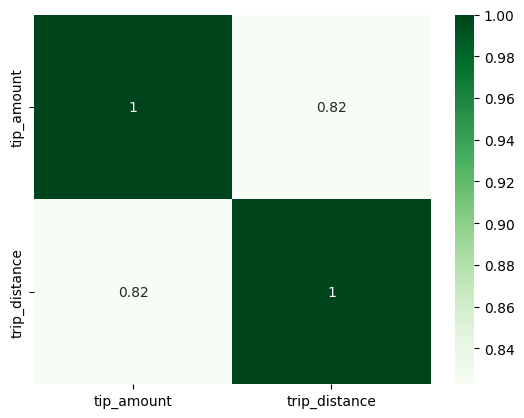

In [374]:
# Show relationship between tip and trip distance
corrDF3 = dfNonZero[['tip_amount', 'trip_distance']]
dfCorr3 = corrDF3.corr()
sns.heatmap(dfCorr3, cmap="Greens", annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

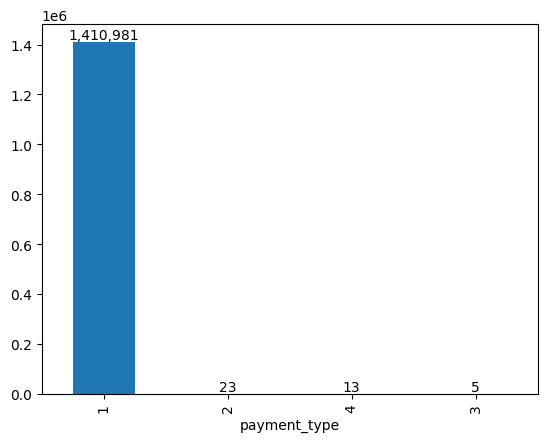

In [784]:
# Analyse the distribution of different payment types (payment_type).
axis = dfNonZero.payment_type.value_counts().plot.bar()
for each in axis.patches:
    axis.annotate(f'{each.get_height():,.0f}', (each.get_x() + each.get_width()/2, each.get_height()), ha = 'center', va = 'bottom', fontsize = 10, color='black')

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [395]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/jpalla/Downloads/EDA Assignment/Datasets and Dictionary/taxi_zones') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

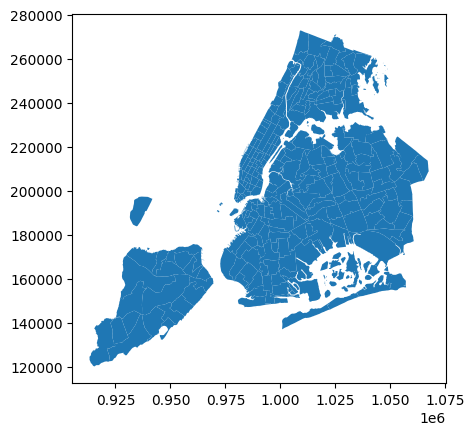

In [396]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [400]:
# Merge zones and trip records using locationID and PULocationID
dfMerged = dfNonZero.merge(zones, how='left', left_on="PULocationID", right_on="LocationID")

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [421]:
# Group data by location and calculate the number of trips
locationCountDF = dfMerged.groupby(['LocationID'], as_index = False).size()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zoneMerged = zones.merge(locationCountDF, how='left', left_on="LocationID", right_on="LocationID")

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

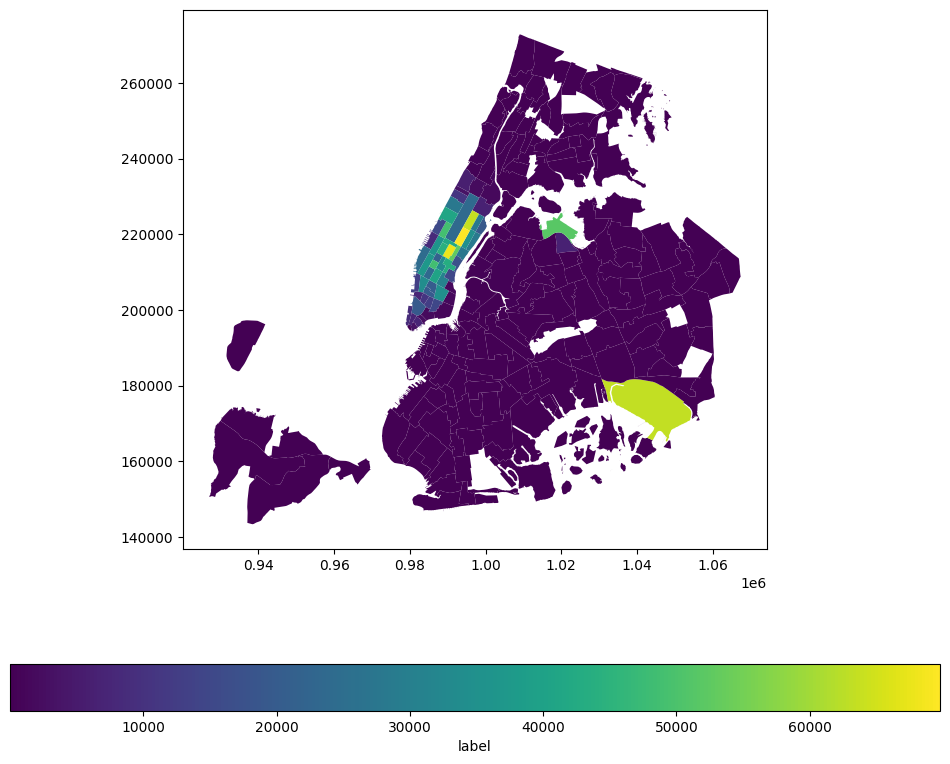

In [432]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zoneMerged.plot(column='size', ax=ax, legend=True, legend_kwds = {'label': "label", 'orientation': "horizontal"})
plt.show()

In [433]:
# can you try displaying the zones DF sorted by the number of trips?
zoneMerged.sort_values(by=['size'])

OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
204       205    0.141953    0.000766              Saint Albans         205   
172       173    0.060064    0.000178              North Corona         173   
135       136    0.090629    0.000149       Kingsbridge Heights         136   
37         38    0.083218    0.000327           Cambria Heights          38   
177       178    0.068253    0.000176       Ocean Parkway South         178   
..        ...         ...         ...                       ...         ...   
209       210    0.114852    0.000453            Sheepshead Bay         210   
213       214    0.135300    0.000812  South Beach/Dongan Hills         214   
220       221    0.166218    0.000890                 Stapleton         221   
244       245    0.095983    0.000466             West Brighton         245   
258       259    0.126750    0.000395        Woodlawn/Wakefield         259   

           borough                                           geometry  size  
204         Queens  POLYGON ((1049028.76 195325.647, 1049096.735 1...   1.0  
172         Queens  POLYGON ((1024308.689 215593.594, 1024336.88 2...   1.0  
135          Bronx  POLYGON ((1011917.87 255536.029, 1012067.463 2...   1.0  
37          Queens  POLYGON ((1057380.088 195339.731, 1057919.545 ...   1.0  
177       Brooklyn  POLYGON ((992354.462 167321.878, 992446.939 16...   1.0  
..             ...                                                ...   ...  
209       Brooklyn  POLYGON ((1004356.905 156081.405, 1004653.331 ...   NaN  
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   NaN  
220  Staten Island  POLYGON ((963349.728 171627.581, 963397.759 17...   NaN  
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   NaN  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   NaN  

[263 rows x 8 columns]

In [440]:
zoneMerged.sort_values(by=['size'], ascending=False).head(20)

OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
131       132    0.245479    0.002038                   JFK Airport   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   
162       163    0.034177    0.000041                 Midtown North   
238       239    0.063626    0.000205         Upper West Side South   
233       234    0.036072    0.000073                      Union Sq   
67         68    0.049337    0.000111                  East Chelsea   
47         48    0.043747    0.000094                  Clinton East   
78         79    0.042625    0.000108                  East Village   
140       141    0.041514    0.000077               Lenox Hill West   
248       249    0.036384    0.000072                  West Village   
163       164    0.035772    0.000056                 Midtown South   
106       107    0.038041    0.000075                      Gramercy   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   
162         163  Manhattan  POLYGON ((989412.663 219020.943, 990045.841 21...   
238         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   
233         234  Manhattan  POLYGON ((987029.847 207022.299, 987048.27 206...   
67           68  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...   
47           48  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...   
78           79  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...   
140         141  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...   
248         249  Manhattan  POLYGON ((983555.319 204876.901, 983469.158 20...   
163         164  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...   
106         107  Manhattan  POLYGON ((989131.643 205749.904, 989084.531 20...   

        size  
236  69786.0  
160  67659.0  
235  63644.0  
131  63307.0  
161  52625.0  
137  51548.0  
141  48903.0  
185  48539.0  
229  44308.0  
169  43109.0  
162  41794.0  
238  41078.0  
233  40381.0  
67   37299.0  
47   36377.0  
78   34797.0  
140  34791.0  
248  33866.0  
163  33236.0  
106  30958.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
dfWithLOCMerges = dfMerged.merge(zones, how='left', left_on="DOLocationID", right_on="LocationID", suffixes=('_PU', '_DO'))

In [519]:
# removing rows with low trip duration as some negatives are also in the dataframe
dfWithLOCMerges = dfWithLOCMerges[(dfWithLOCMerges.trip_duration >= 10) & (dfWithLOCMerges.trip_duration <= 18000)]
dfWithLOCMerges['route'] = dfWithLOCMerges['zone_PU'] + ' - ' + dfWithLOCMerges['zone_DO']
routeDistance = dfWithLOCMerges.groupby('route', as_index = False)['trip_distance'].median()
tripDurationByHour = dfWithLOCMerges.groupby(['route', 'tpep_pickup_datetime_hour'], as_index=False)['trip_duration'].mean()
tripDurationByHour = tripDurationByHour.merge(routeDistance, how='left', on="route")
tripDurationByHour['speed'] = (tripDurationByHour.trip_distance/tripDurationByHour.trip_duration) * 60 * 60 #converting to miles per hour

In [522]:
tripDurationByHour.sort_values(by=['speed']).head(30)

route  \
8820                      Clinton East - Pelham Bay Park   
55200                                  Maspeth - Maspeth   
95860                                Woodside - Woodside   
56068  Meatpacking/West Village West - Meatpacking/We...   
56346  Meatpacking/West Village West - South Williams...   
95534  Williamsburg (North Side) - Williamsburg (Nort...   
6688                               Chinatown - Chinatown   
51579  Long Island City/Hunters Point - Long Island C...   
55201                                  Maspeth - Maspeth   
10                         Alphabet City - Alphabet City   
38020                  Jackson Heights - Jackson Heights   
2678                         Bloomingdale - Bloomingdale   
74640                              Sunnyside - Sunnyside   
20097  Financial District North - Financial District ...   
97105            World Trade Center - World Trade Center   
4187                   Carroll Gardens - Carroll Gardens   
10943                          Cobble Hill - Cobble Hill   
72535                         SoHo - Little Italy/NoLiTa   
20107  Financial District North - Financial District ...   
88007      Upper East Side South - Upper East Side South   
95807                         Woodside - Jackson Heights   
21409  Financial District South - Financial District ...   
3762                 Brooklyn Heights - Brooklyn Heights   
95532  Williamsburg (North Side) - Williamsburg (Nort...   
20091  Financial District North - Financial District ...   
96770                       World Trade Center - Seaport   
91621  Washington Heights South - Washington Heights ...   
51931          Long Island City/Queens Plaza - Sunnyside   
14839                  East Elmhurst - LaGuardia Airport   
24240                        Forest Hills - Forest Hills   

       tpep_pickup_datetime_hour  trip_duration  trip_distance     speed  
8820                           1    3940.000000          0.140  0.127919  
55200                         14    3877.000000          0.260  0.241424  
95860                         18   13233.000000          1.090  0.296531  
56068                          7    5887.000000          0.620  0.379140  
56346                         19    1579.000000          0.230  0.524383  
95534                         16    3516.000000          0.665  0.680887  
6688                          16    2863.000000          0.610  0.767028  
51579                         10    3447.000000          0.740  0.772846  
55201                         17    1211.000000          0.260  0.772915  
10                            22    1796.000000          0.395  0.791759  
38020                         20    3912.000000          0.970  0.892638  
2678                          14    2306.000000          0.580  0.905464  
74640                         11    3135.000000          0.810  0.930144  
20097                         15    1871.666667          0.495  0.952093  
97105                         12    2651.600000          0.720  0.977523  
4187                          17    1763.000000          0.485  0.990357  
10943                          8    1332.000000          0.375  1.013514  
72535                          4    1994.000000          0.600  1.083250  
20107                          2    1720.000000          0.525  1.098837  
88007                          5    1970.000000          0.620  1.132995  
95807                         22    3873.000000          1.230  1.143300  
21409                         16    2193.000000          0.700  1.149111  
3762                          10    1701.000000          0.580  1.227513  
95532                         12    1907.000000          0.665  1.255375  
20091                          9    1415.000000          0.495  1.259364  
96770                          8    1952.000000          0.705  1.300205  
91621                         11    1690.000000          0.620  1.320710  
51931                         14    3590.000000          1.380  1.383844  
14839          

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [792]:
# Visualise the number of trips per hour and find the busiest hour
tripCountByHour = dfWithLOCMerges.groupby(['tpep_pickup_datetime_hour'], as_index = False).size()
tripCountByHour = tripCountByHour.sort_values(by=['size'], ascending=False)
# busiest hour and trips
tripCountByHour.head(1)

tpep_pickup_datetime_hour    size
18                         18  102858

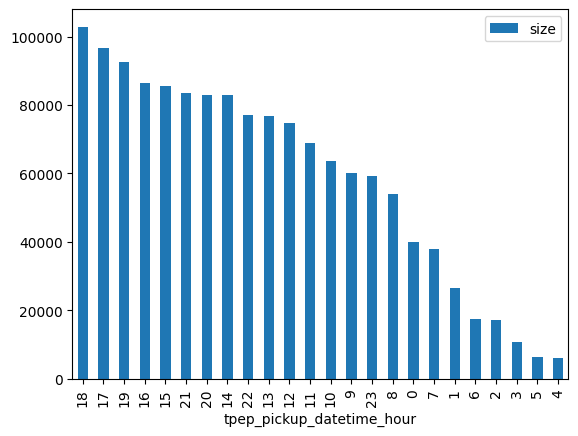

In [794]:
tripCountByHour.plot.bar(x='tpep_pickup_datetime_hour', y='size')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [795]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 20 #since we picked only 5% of the data, to scale up we can multiple our numbers by 20 to get actual values
tripCountByHour['size'] = tripCountByHour['size'] * sample_fraction
tripCountByHour.head(5)

tpep_pickup_datetime_hour     size
18                         18  2057160
17                         17  1934760
19                         19  1850820
16                         16  1731780
15                         15  1709360

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

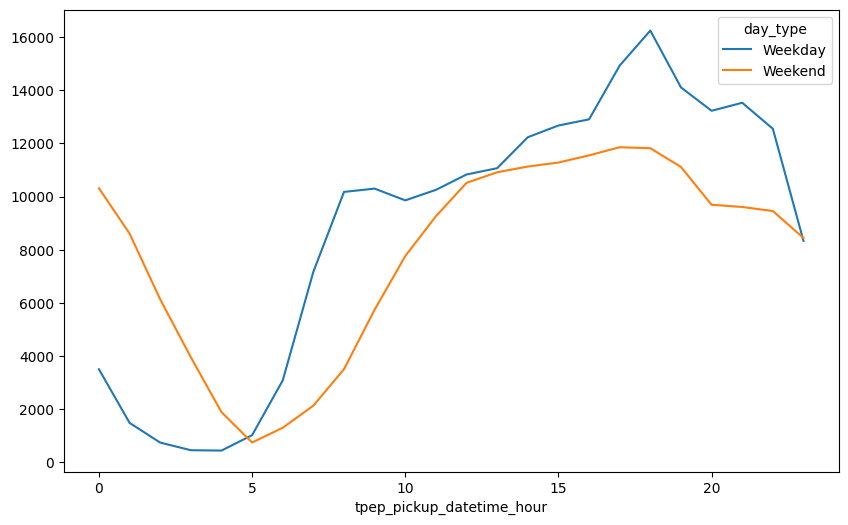

In [712]:
# Compare traffic trends for the week days and weekends
tripCountByDayAndHour = dfWithLOCMerges.groupby(['tpep_pickup_dayOfWeek', 'tpep_pickup_datetime_hour'], as_index = False).size()
tripCountByDayAndHour['day_type'] = tripCountByDayAndHour['tpep_pickup_dayOfWeek'].apply(lambda x : 'Weekday' if x <=4 else 'Weekend')
aggTripsByDayType = tripCountByDayAndHour.groupby(['tpep_pickup_datetime_hour', 'day_type'], as_index=False)['size'].median()
pd.pivot_table(data=aggTripsByDayType, values="size", index="tpep_pickup_datetime_hour", columns="day_type").plot(figsize=[10,6])
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
# pickup code
tripCountByPUZoneByHour = dfWithLOCMerges.groupby(['zone_PU', 'tpep_pickup_datetime_hour'], as_index = False).size()
tripCountByPUZoneByHour = tripCountByPUZoneByHour.sort_values(by=['size'])
puZoneToSize = dict(zip(tripCountByPUZoneByHour['zone_PU'], tripCountByPUZoneByHour['size']))
puZoneToSizeSorted = dict(sorted(puZoneToSize.items(), key=lambda x: x[1], reverse=True))
top10ZonesPU = list(puZoneToSizeSorted.items())[:10]

# drop off code
dfWithLOCMerges['tpep_dropoff_datetime_hour'] = dfWithLOCMerges.tpep_dropoff_datetime.dt.hour
tripCountByDOZoneByHour = dfWithLOCMerges.groupby(['zone_DO', 'tpep_dropoff_datetime_hour'], as_index = False).size()
tripCountByDOZoneByHour = tripCountByDOZoneByHour.sort_values(by=['size'])
doZoneToSize = dict(zip(tripCountByDOZoneByHour['zone_DO'], tripCountByDOZoneByHour['size']))
doZoneToSizeSorted = dict(sorted(doZoneToSize.items(), key=lambda x: x[1], reverse=True))
top10ZonesDO = list(doZoneToSizeSorted.items())[:10]

print('Top 10 Zones for Pick up', top10ZonesPU)
print('Top 10 Zones for Drop Off', top10ZonesDO)

Top 10 Zones for Pick up [('Midtown Center', 6057), ('Upper East Side South', 5394), ('Upper East Side North', 5264), ('JFK Airport', 4740), ('Midtown East', 4647), ('Lincoln Square East', 3978), ('LaGuardia Airport', 3850), ('Midtown North', 3749), ('Murray Hill', 3532), ('Times Sq/Theatre District', 3358)]
Top 10 Zones for Drop Off [('Upper East Side South', 5261), ('Upper East Side North', 5217), ('Midtown Center', 4252), ('Lincoln Square East', 3918), ('Upper West Side South', 3598), ('Times Sq/Theatre District', 3391), ('Lenox Hill West', 3168), ('Midtown East', 3081), ('Murray Hill', 3004), ('East Village', 2893)]


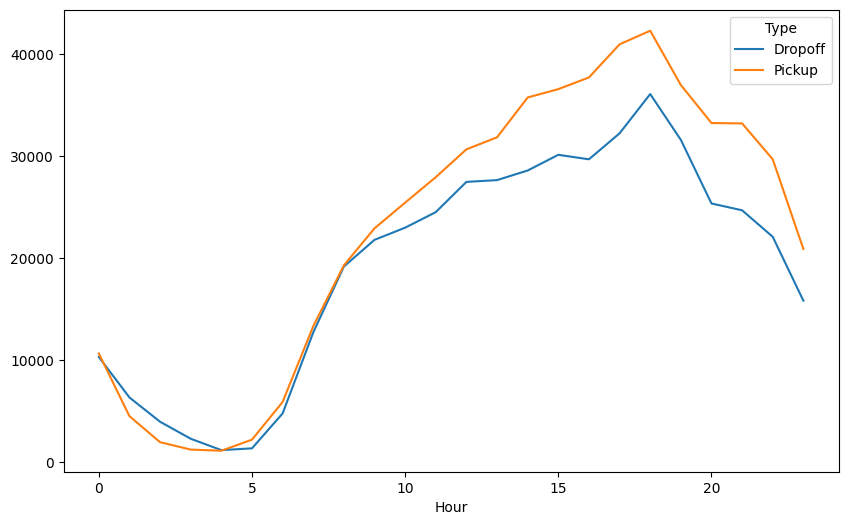

In [638]:
# Pick up Trend by Hour
dfWithTop10PU = dfWithLOCMerges[dfWithLOCMerges.zone_PU.isin(list(dict(top10ZonesPU).keys()))]
dfWithTop10DO = dfWithLOCMerges[dfWithLOCMerges.zone_DO.isin(list(dict(top10ZonesDO).keys()))]

dfWithTop10ByHour = dfWithTop10PU.groupby(['tpep_pickup_datetime_hour'], as_index=False).size()
dfWithTop10ByHour['Type'] = 'Pickup'
dfWithTop10ByHour = dfWithTop10ByHour.rename(columns={"tpep_pickup_datetime_hour": "Hour", "size": "Number of Trips"})

dfWithTop10ByHourDO = dfWithTop10DO.groupby(['tpep_dropoff_datetime_hour'], as_index=False).size()
dfWithTop10ByHourDO['Type'] = 'Dropoff'
dfWithTop10ByHourDO = dfWithTop10ByHourDO.rename(columns={"tpep_dropoff_datetime_hour": "Hour", "size": "Number of Trips"})

dfWithTop10ByHour = pd.concat([dfWithTop10ByHour, dfWithTop10ByHourDO])

pd.pivot_table(data=dfWithTop10ByHour, values="Number of Trips", index="Hour", columns="Type").plot(figsize=[10,6])
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [654]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
puCounts = dfWithLOCMerges.zone_PU.value_counts().to_dict()
doCounts = dfWithLOCMerges.zone_DO.value_counts().to_dict()
ratioMap = {}

for eachItem in puCounts.keys():
    if (puCounts.get(eachItem) is not None and doCounts.get(eachItem) is not None):
        ratioMap[eachItem] = round(puCounts.get(eachItem)/doCounts.get(eachItem), 2)

ratioMap = dict(sorted(ratioMap.items(), key=lambda x: x[1]))

print('Bottom 10 Ratios', list(ratioMap.items())[:10])
print('Top 10 Ratios', list(ratioMap.items())[-10:])

Bottom 10 Ratios [('Newark Airport', 0.0), ('Stuyvesant Heights', 0.01), ('Bay Ridge', 0.01), ('Ridgewood', 0.01), ('Windsor Terrace', 0.01), ('Bayside', 0.01), ('Midwood', 0.01), ('Woodhaven', 0.01), ('Flatlands', 0.01), ('Belmont', 0.01)]
Top 10 Ratios [('Garment District', 1.22), ('Midtown East', 1.27), ('West Village', 1.33), ('Greenwich Village South', 1.38), ('Central Park', 1.39), ('Penn Station/Madison Sq West', 1.65), ('Saint Michaels Cemetery/Woodside', 1.71), ('LaGuardia Airport', 2.88), ('JFK Airport', 4.79), ('East Elmhurst', 13.9)]


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [663]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
print(dfWithLOCMerges[(dfWithLOCMerges.tpep_pickup_datetime_hour >= 23) | (dfWithLOCMerges.tpep_pickup_datetime_hour <= 5)].zone_PU.value_counts()[:10])
print(dfWithLOCMerges[(dfWithLOCMerges.tpep_dropoff_datetime_hour >= 23) | (dfWithLOCMerges.tpep_dropoff_datetime_hour <= 5)].zone_DO.value_counts()[:10])

zone_PU
East Village                    12824
West Village                    10475
JFK Airport                      9479
Clinton East                     8050
Lower East Side                  7987
Greenwich Village South          7269
Times Sq/Theatre District        5872
Penn Station/Madison Sq West     5346
Midtown South                    4777
LaGuardia Airport                4675
Name: count, dtype: int64
zone_DO
East Village             7231
Clinton East             5515
Murray Hill              5385
Gramercy                 5197
Lenox Hill West          4933
East Chelsea             4834
Yorkville West           4664
West Village             4459
Upper West Side South    4203
Upper East Side North    4165
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [676]:
# Filter for night hours (11 PM to 5 AM)
dfWithLOCMerges['partOfDay'] = dfWithLOCMerges['tpep_pickup_datetime_hour'].apply(lambda x : 'Night' if x >= 23 or x <= 5 else 'Day')
revenueDict = dfWithLOCMerges.groupby(['partOfDay'])['total_amount'].sum()
print('Revenue Share Day - ', revenueDict.get('Day')/(revenueDict.get('Day') + revenueDict.get('Night')))
print('Revenue Share Night - ', revenueDict.get('Night')/(revenueDict.get('Day') + revenueDict.get('Night')))

Revenue Share Day -  0.8808759526100965
Revenue Share Night -  0.1191240473899035


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
# add parameter total amount/miles, group by passenger count
dfWithLOCMerges['farePerMile'] = dfWithLOCMerges['total_amount']/dfWithLOCMerges['trip_distance']
farePerMileDict = dfWithLOCMerges.groupby(['passenger_count'])['farePerMile'].mean()

for each in farePerMileDict.keys():
    print('For passenger count ', int(each), ' the average fare per mile per passenger is ', round(farePerMileDict.get(each)/each, 2))

For passenger count  1  the average fare per mile per passenger is  13.29
For passenger count  2  the average fare per mile per passenger is  6.45
For passenger count  3  the average fare per mile per passenger is  4.36
For passenger count  4  the average fare per mile per passenger is  3.29
For passenger count  5  the average fare per mile per passenger is  2.57
For passenger count  6  the average fare per mile per passenger is  2.15


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

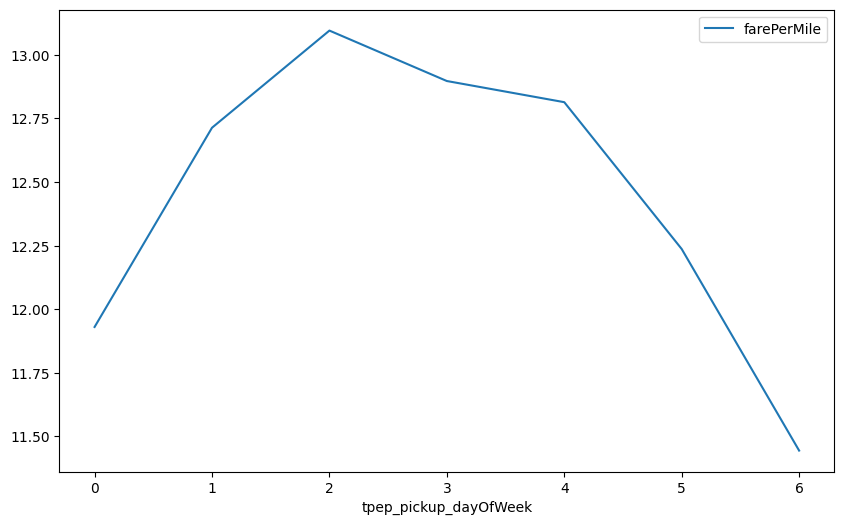

In [839]:
# Compare the average fare per mile for different days and for different times of the day
farePerMileDist = dfWithLOCMerges.groupby(['tpep_pickup_dayOfWeek', 'tpep_pickup_datetime_hour'], as_index=False)['farePerMile'].mean()

pd.pivot_table(data=farePerMileDist, values="farePerMile", index="tpep_pickup_dayOfWeek").plot(figsize=[10,6])
plt.show()

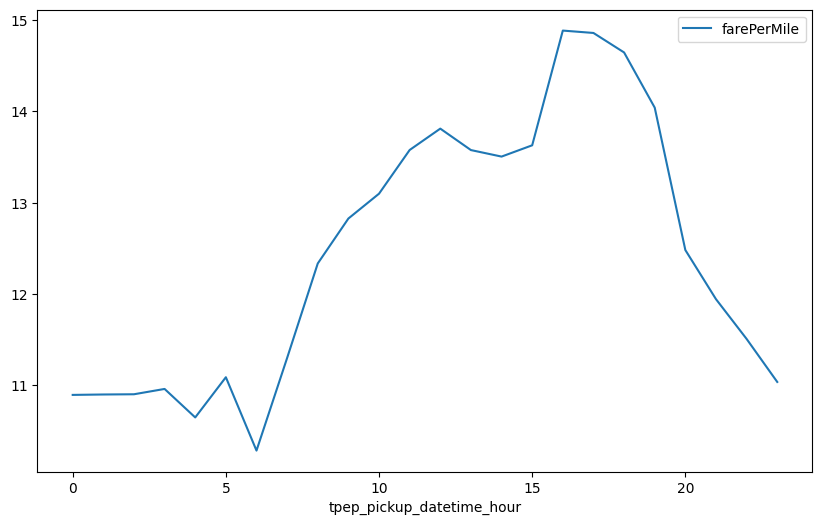

In [840]:
pd.pivot_table(data=farePerMileDist, values="farePerMile", index="tpep_pickup_datetime_hour").plot(figsize=[10,6])
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

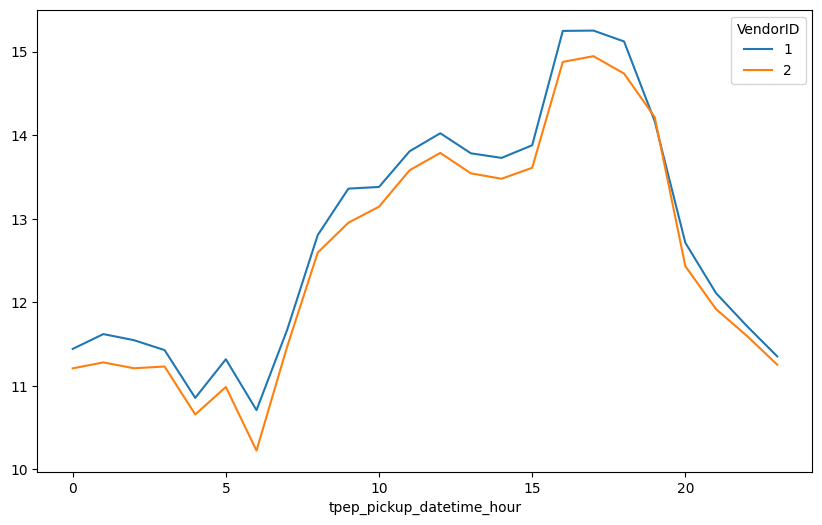

In [841]:
# Compare fare per mile for different vendors
farePerMilePerVendor = dfWithLOCMerges.groupby(['VendorID', 'tpep_pickup_datetime_hour'], as_index=False)['farePerMile'].mean()
pd.pivot_table(data=farePerMilePerVendor, values="farePerMile", index="tpep_pickup_datetime_hour", columns='VendorID').plot(figsize=[10,6])
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [803]:
# Defining distance tiers
dfWithLOCMerges['distanceTier'] = dfWithLOCMerges['trip_distance'].apply(lambda x : 'Upto 2 Miles' if x <= 2 else ('2-5 Miles' if x > 2 and x <= 5 else 'More than 5 Miles'))
dfWithLOCMerges.groupby(['VendorID', 'distanceTier'])['farePerMile'].mean()

VendorID  distanceTier     
1         2-5 Miles             9.510296
          More than 5 Miles     6.408244
          Upto 2 Miles         17.028959
2         2-5 Miles             9.773490
          More than 5 Miles     6.443260
          Upto 2 Miles         17.036479
Name: farePerMile, dtype: float64

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [691]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
dfWithLOCMerges['tipPercentage'] = round((dfWithLOCMerges['tip_amount']/dfWithLOCMerges['total_amount']) * 100, 2)
dfWithLOCMerges.groupby(['trip_distance'])['tipPercentage'].mean()

trip_distance
0.11      17.168987
0.12      18.952200
0.13      15.358864
0.14      18.284348
0.15      15.971282
            ...    
77.96     16.550000
89.24     10.690000
99.02      1.500000
104.30     9.090000
187.35     0.080000
Name: tipPercentage, Length: 3560, dtype: float64

In [693]:
dfWithLOCMerges.groupby(['passenger_count'])['tipPercentage'].mean()

passenger_count
1.0    15.395719
2.0    15.419164
3.0    15.392011
4.0    15.560109
5.0    15.434074
6.0    15.506086
Name: tipPercentage, dtype: float64

In [694]:
dfWithLOCMerges.groupby(['tpep_pickup_datetime_hour'])['tipPercentage'].mean()

tpep_pickup_datetime_hour
0     15.127745
1     15.138968
2     15.141931
3     15.181863
4     15.447145
5     15.207868
6     15.167316
7     15.213033
8     15.299149
9     15.499306
10    15.647020
11    15.695030
12    15.668079
13    15.685412
14    15.632187
15    15.533117
16    15.351097
17    15.265745
18    15.254823
19    15.183447
20    15.373636
21    15.411722
22    15.351168
23    15.225152
Name: tipPercentage, dtype: float64

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [710]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
dfWithLOCMerges[dfWithLOCMerges.tipPercentage < 10][['trip_distance', 'passenger_count', 'tip_amount', 'tolls_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge',
    'total_amount', 'congestion_surcharge', 'airport_fee_new', 'trip_duration']].corr()

trip_distance  passenger_count  tip_amount  \
trip_distance               1.000000         0.042400    0.779079   
passenger_count             0.042400         1.000000    0.029567   
tip_amount                  0.779079         0.029567    1.000000   
tolls_amount                0.644552         0.038647    0.595355   
fare_amount                 0.947480         0.043963    0.806899   
extra                       0.151981        -0.038396    0.191084   
mta_tax                    -0.277983        -0.031499   -0.303247   
improvement_surcharge       0.003718         0.000063    0.004269   
congestion_surcharge       -0.434113        -0.014759   -0.345622   
total_amount                0.947116         0.043464    0.841958   
congestion_surcharge       -0.434113        -0.014759   -0.345622   
airport_fee_new             0.673155         0.023490    0.546065   
trip_duration               0.780774         0.037191    0.683960   

                       tolls_amount  fare_amount     extra   mta_tax  \
trip_distance              0.644552     0.947480  0.151981 -0.277983   
passenger_count            0.038647     0.043963 -0.038396 -0.031499   
tip_amount                 0.595355     0.806899  0.191084 -0.303247   
tolls_amount               1.000000     0.642027  0.207956 -0.504414   
fare_amount                0.642027     1.000000  0.130535 -0.387254   
extra                      0.207956     0.130535  1.000000  0.040719   
mta_tax                   -0.504414    -0.387254  0.040719  1.000000   
improvement_surcharge      0.002566     0.001283  0.009044 -0.004454   
congestion_surcharge      -0.267723    -0.445266 -0.066350  0.326593   
total_amount               0.714713     0.990601  0.204437 -0.393554   
congestion_surcharge      -0.267723    -0.445266 -0.066350  0.326593   
airport_fee_new            0.456322     0.607371  0.308728 -0.033224   
trip_duration              0.473785     0.841984  0.136066 -0.178642   

                       improvement_surcharge  congestion_surcharge  \
trip_distance                       0.003718             -0.434113   
passenger_count                     0.000063             -0.014759   
tip_amount                          0.004269             -0.345622   
tolls_amount                        0.002566             -0.267723   
fare_amount                         0.001283             -0.445266   
extra                               0.009044             -0.066350   
mta_tax                            -0.004454              0.326593   
improvement_surcharge               1.000000              0.003154   
congestion_surcharge                0.003154              1.000000   
total_amount                        0.002763             -0.425909   
congestion_surcharge                0.003154              1.000000   
airport_fee_new                     0.001981             -0.493257   
trip_duration                       0.003142             -0.261657   

                       total_amount  congestion_surcharge  airport_fee_new  \
trip_distance              0.947116             -0.434113         0.673155   
passenger_count            0.043464             -0.014759         0.023490   
tip_amount                 0.841958             -0.345622         0.546065   
tolls_amount               0.714713             -0.267723         0.456322   
fare_amount                0.990601             -0.445266         0.607371   
extra                      0.204437             -0.066350         0.308728   
mta_tax                   -0.393554              0.326593        -0.033224   
improvement_surcharge      0.002763              0.003154         0.001981   
congestion_surcharge      -0.425909              1.000000        -0.493257   
total_amount               1.000000             -0.425909         0.638538   
congestion_surcharge      -0.425909              1.000000        -0.493257   
airport_fee_new            0.638538             -0.493257         1.000000   
trip_duration              0.830888             -0.2

In [804]:
dfWithLOCMerges[dfWithLOCMerges.tipPercentage > 25][['trip_distance', 'passenger_count', 'tip_amount', 'tolls_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge',
    'total_amount', 'congestion_surcharge', 'airport_fee_new', 'trip_duration']].corr()

trip_distance  passenger_count  tip_amount  \
trip_distance               1.000000         0.051678    0.692675   
passenger_count             0.051678         1.000000    0.035721   
tip_amount                  0.692675         0.035721    1.000000   
tolls_amount                0.563121         0.029840    0.437254   
fare_amount                 0.938723         0.061103    0.731083   
extra                       0.148741        -0.026626    0.118744   
mta_tax                    -0.157792         0.007973   -0.160019   
improvement_surcharge       0.012162         0.005108    0.012634   
congestion_surcharge       -0.206686         0.044902   -0.161471   
total_amount                0.902172         0.055163    0.891658   
congestion_surcharge       -0.206686         0.044902   -0.161471   
airport_fee_new             0.491046         0.010318    0.354562   
trip_duration               0.778616         0.063844    0.656197   

                       tolls_amount  fare_amount     extra   mta_tax  \
trip_distance              0.563121     0.938723  0.148741 -0.157792   
passenger_count            0.029840     0.061103 -0.026626  0.007973   
tip_amount                 0.437254     0.731083  0.118744 -0.160019   
tolls_amount               1.000000     0.555344  0.170884 -0.344424   
fare_amount                0.555344     1.000000  0.135993 -0.197289   
extra                      0.170884     0.135993  1.000000  0.045768   
mta_tax                   -0.344424    -0.197289  0.045768  1.000000   
improvement_surcharge      0.004141     0.013822  0.020116 -0.001427   
congestion_surcharge      -0.086144    -0.165239  0.053706  0.141306   
total_amount               0.598588     0.954037  0.188517 -0.200776   
congestion_surcharge      -0.086144    -0.165239  0.053706  0.141306   
airport_fee_new            0.260052     0.421433  0.253354  0.005964   
trip_duration              0.426890     0.890656  0.128408 -0.119525   

                       improvement_surcharge  congestion_surcharge  \
trip_distance                       0.012162             -0.206686   
passenger_count                     0.005108              0.044902   
tip_amount                          0.012634             -0.161471   
tolls_amount                        0.004141             -0.086144   
fare_amount                         0.013822             -0.165239   
extra                               0.020116              0.053706   
mta_tax                            -0.001427              0.141306   
improvement_surcharge               1.000000             -0.008219   
congestion_surcharge               -0.008219              1.000000   
total_amount                        0.014992             -0.148669   
congestion_surcharge               -0.008219              1.000000   
airport_fee_new                     0.005329             -0.438106   
trip_duration                       0.013931             -0.047245   

                       total_amount  congestion_surcharge  airport_fee_new  \
trip_distance              0.902172             -0.206686         0.491046   
passenger_count            0.055163              0.044902         0.010318   
tip_amount                 0.891658             -0.161471         0.354562   
tolls_amount               0.598588             -0.086144         0.260052   
fare_amount                0.954037             -0.165239         0.421433   
extra                      0.188517              0.053706         0.253354   
mta_tax                   -0.200776              0.141306         0.005964   
improvement_surcharge      0.014992             -0.008219         0.005329   
congestion_surcharge      -0.148669              1.000000        -0.438106   
total_amount               1.000000             -0.148669         0.439171   
congestion_surcharge      -0.148669              1.000000        -0.438106   
airport_fee_new            0.439171             -0.438106         1.000000   
trip_duration              0.847746             -0.0

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

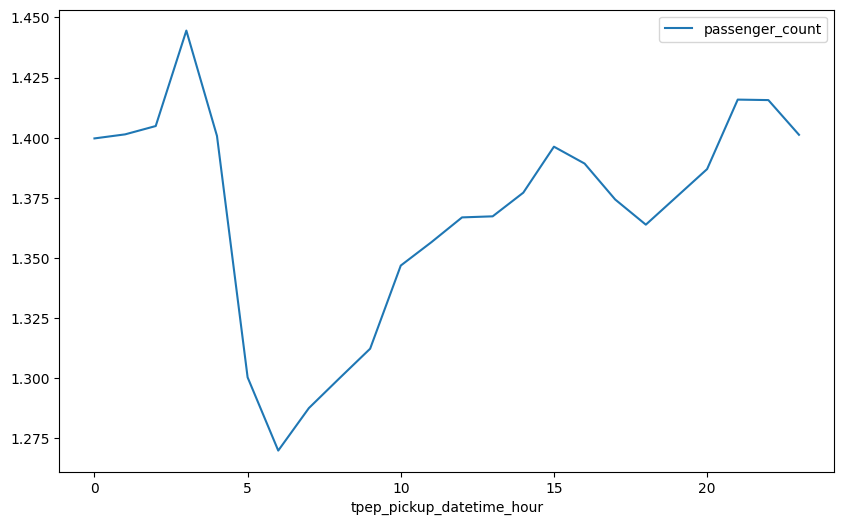

In [844]:
# See how passenger count varies across hours and days
passengerCountBreakup = dfWithLOCMerges.groupby(['tpep_pickup_datetime_hour', 'tpep_pickup_dayOfWeek'], as_index=False)['passenger_count'].mean()
pd.pivot_table(data=passengerCountBreakup, values="passenger_count", index="tpep_pickup_datetime_hour").plot(figsize=[10,6])
plt.show()

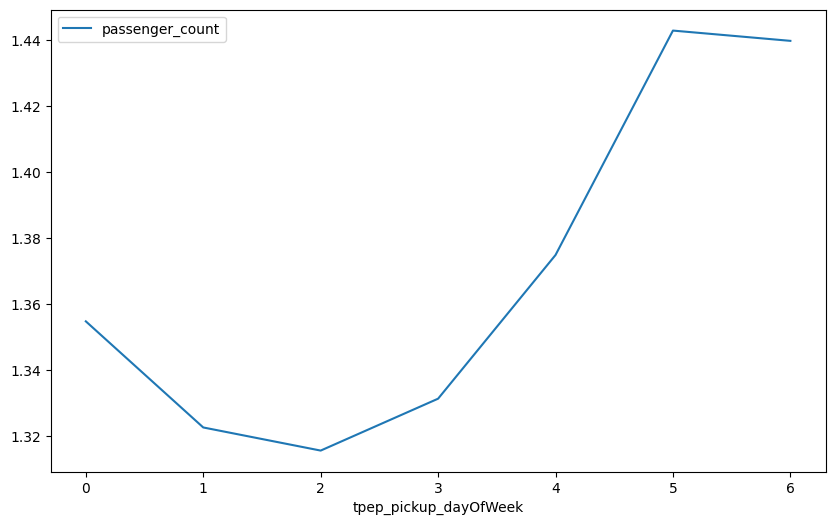

In [845]:
pd.pivot_table(data=passengerCountBreakup, values="passenger_count", index="tpep_pickup_dayOfWeek").plot(figsize=[10,6])
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<Axes: xlabel='zone_PU'>

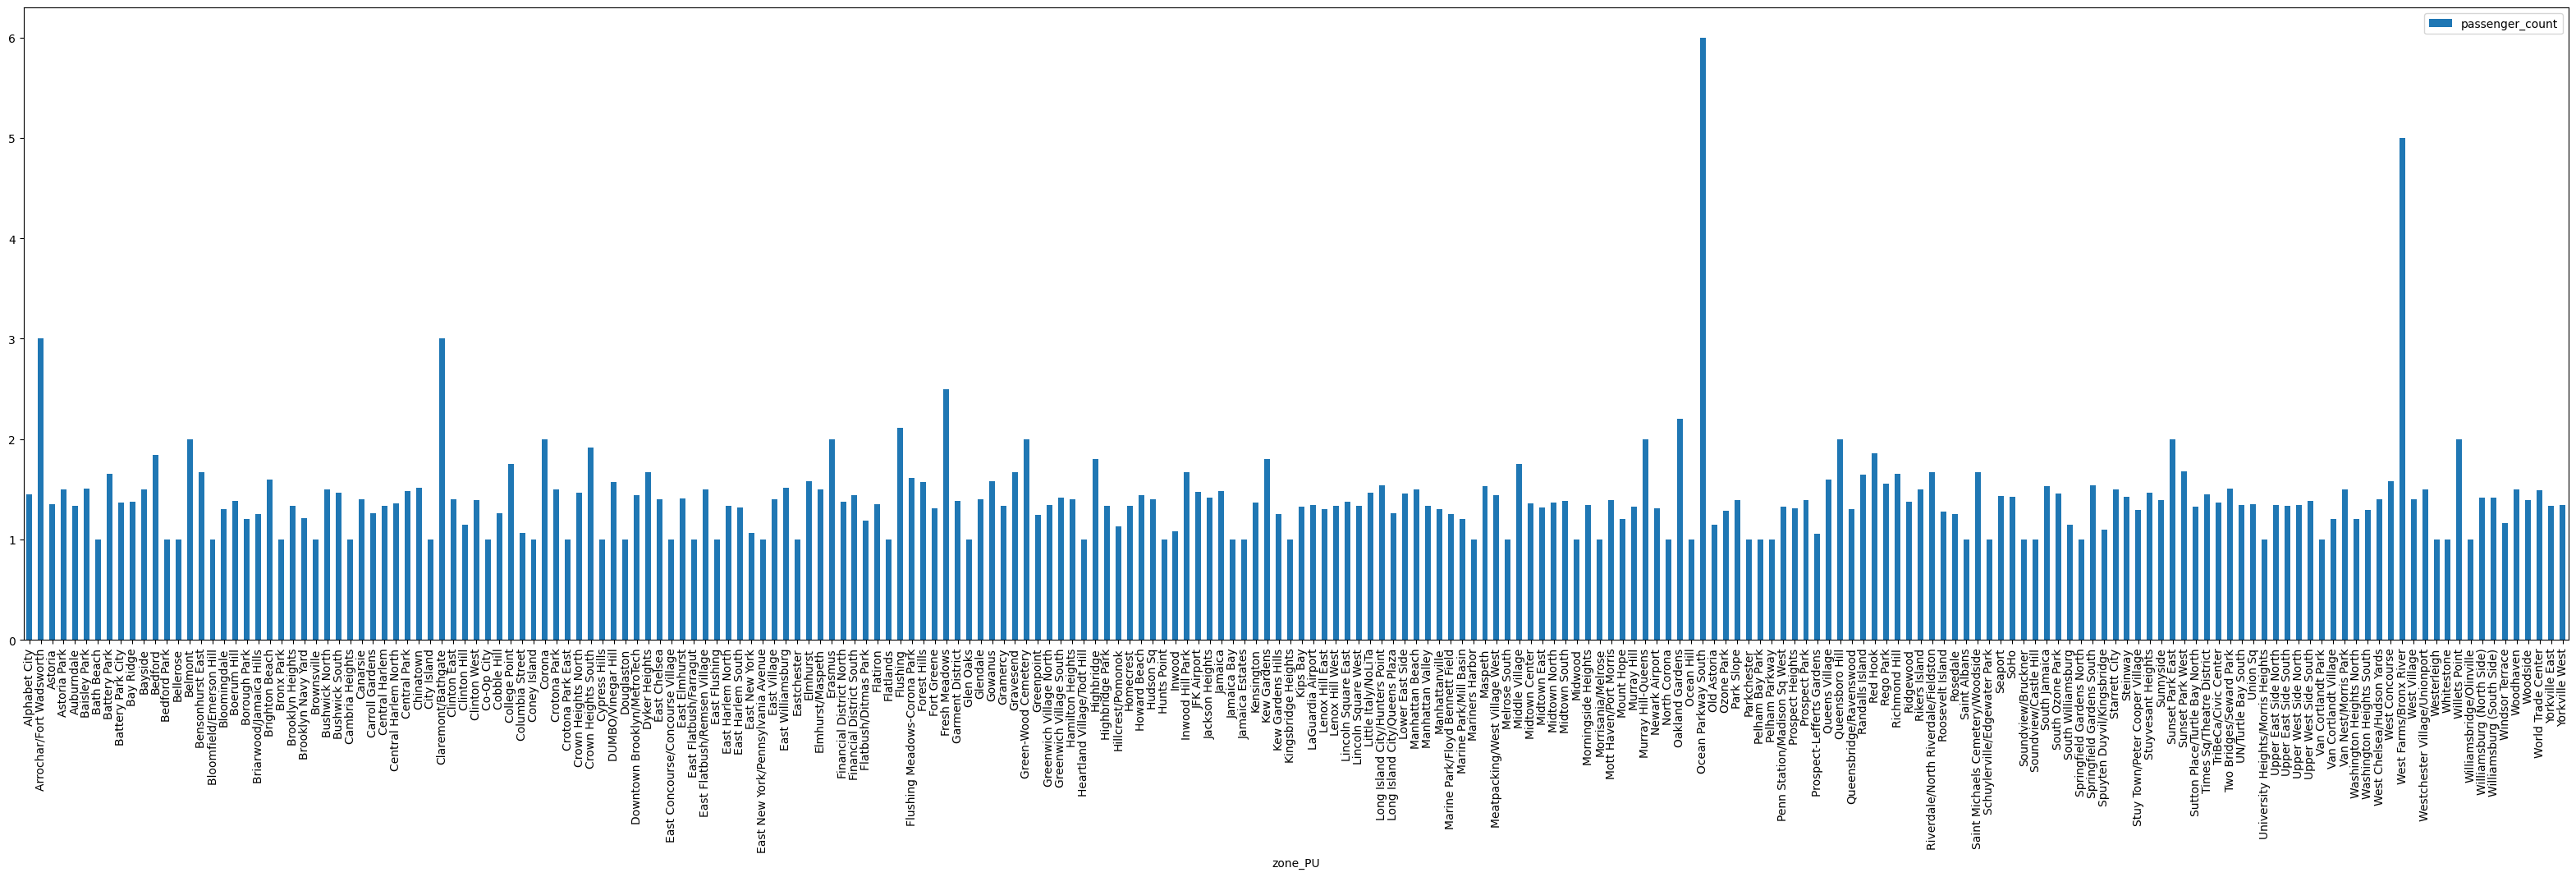

In [887]:
# How does passenger count vary across zones
dfWithLOCMerges.groupby(['zone_PU'], as_index=False)['passenger_count'].mean().plot(kind='bar', rot=90, x='zone_PU', y='passenger_count', fontsize=10, figsize=(40, 10))

In [761]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avgPassengerCountByZone = dfWithLOCMerges.groupby(['zone_PU'], as_index=False)['passenger_count'].mean()
zoneMerged = zoneMerged.merge(avgPassengerCountByZone, how='left', left_on="zone", right_on="zone_PU")

In [ ]:
import math
zoneMerged.passenger_count = zoneMerged.passenger_count.apply(lambda x : 0 if math.isnan(x) else round(x))

0      1
1      1
2      0
3      1
4      0
      ..
258    0
259    1
260    1
261    1
262    1
Name: passenger_count, Length: 263, dtype: int64

In [890]:
zoneMerged.sort_values(by='passenger_count', ascending=False)

OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
177       178    0.068253    0.000176        Ocean Parkway South         178   
247       248    0.056919    0.000150     West Farms/Bronx River         248   
46         47    0.089828    0.000163         Claremont/Bathgate          47   
5           6    0.150491    0.000606    Arrochar/Fort Wadsworth           6   
56         57    0.019271    0.000018                     Corona          56   
..        ...         ...         ...                        ...         ...   
182       183    0.039826    0.000095                 Pelham Bay         183   
98         99    0.183371    0.001210            Freshkills Park          99   
205       206    0.212757    0.000944  Saint George/New Brighton         206   
31         32    0.054267    0.000151                  Bronxdale          32   
43         44    0.235689    0.001945     Charleston/Tottenville          44   

           borough                                           geometry  size  \
177       Brooklyn  POLYGON ((992354.462 167321.878, 992446.939 16...   1.0   
247          Bronx  POLYGON ((1021898.26 245357.487, 1022005.186 2...   1.0   
46           Bronx  POLYGON ((1014430.835 250474.121, 1014081.534 ...   2.0   
5    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   1.0   
56          Queens  POLYGON ((1025447.751 212499.788, 1024585.351 ...  58.0   
..             ...                                                ...   ...   
182          Bronx  POLYGON ((1029414.164 246587.728, 1029380.19 2...   NaN   
98   Staten Island  POLYGON ((937468.341 152998.406, 937320.263 15...   NaN   
205  Staten Island  POLYGON ((961436.305 175473.03, 961460.942 175...   NaN   
31           Bronx  POLYGON ((1023302.25 251923.918, 1022481.96 25...   NaN   
43   Staten Island  POLYGON ((925284.273 142075.259, 924921.951 14...   NaN   

                     zone_PU  passenger_count  
177      Ocean Parkway South                6  
247   West Farms/Bronx River                5  
46        Claremont/Bathgate                3  
5    Arrochar/Fort Wadsworth                3  
56                    Corona                2  
..                       ...              ...  
182                      NaN                0  
98                       NaN                0  
205                      NaN                0  
31                       NaN                0  
43                       NaN                0  

[263 rows x 10 columns]

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [871]:
# How often is each surcharge applied?
(dfWithLOCMerges[dfWithLOCMerges.congestion_surcharge > 0].groupby(['zone_PU'], as_index=False)['congestion_surcharge'].count()).sort_values(by=['congestion_surcharge'], ascending=False).head(10)

zone_PU  congestion_surcharge
159         Upper East Side South                 69644
105                Midtown Center                 67205
158         Upper East Side North                 63389
106                  Midtown East                 52332
93            Lincoln Square East                 48723
119  Penn Station/Madison Sq West                 48302
152     Times Sq/Theatre District                 43657
113                   Murray Hill                 42899
107                 Midtown North                 41404
161         Upper West Side South                 40912

In [874]:
(dfWithLOCMerges[dfWithLOCMerges.improvement_surcharge > 0].groupby(['zone_PU'], as_index=False)['improvement_surcharge'].count()).sort_values(by=['improvement_surcharge'], ascending=False).head(10)

zone_PU  improvement_surcharge
197         Upper East Side South                  69747
131                Midtown Center                  67624
196         Upper East Side North                  63621
102                   JFK Airport                  63268
132                  Midtown East                  52593
112             LaGuardia Airport                  51548
115           Lincoln Square East                  48876
153  Penn Station/Madison Sq West                  48520
190     Times Sq/Theatre District                  44288
140                   Murray Hill                  43087

In [880]:
(dfWithLOCMerges[dfWithLOCMerges.extra > 0].groupby(['zone_PU'], as_index=False)['extra'].count()).sort_values(by=['extra'], ascending=False).head(10)

zone_PU  extra
99              LaGuardia Airport  50940
117                Midtown Center  44571
177         Upper East Side South  40389
176         Upper East Side North  33820
118                  Midtown East  33366
102           Lincoln Square East  31162
170     Times Sq/Theatre District  30370
91                    JFK Airport  29795
137  Penn Station/Madison Sq West  28963
59                   East Village  27188

In [876]:
(dfWithLOCMerges[dfWithLOCMerges.congestion_surcharge > 0].groupby(['tpep_pickup_datetime_hour'], as_index=False)['congestion_surcharge'].count()).sort_values(by=['congestion_surcharge'], ascending=False)

tpep_pickup_datetime_hour  congestion_surcharge
18                         18                 98449
17                         17                 92274
19                         19                 88183
16                         16                 82004
15                         15                 80979
21                         21                 79250
20                         20                 78759
14                         14                 78697
13                         13                 73244
22                         22                 72712
12                         12                 71719
11                         11                 66165
10                         10                 60807
9                           9                 57362
23                         23                 54769
8                           8                 51499
0                           0                 37269
7                           7                 35701
1                           1                 25408
2                           2                 16598
6                           6                 15950
3                           3                 10298
4                           4                  5706
5                           5                  5691

In [877]:
(dfWithLOCMerges[dfWithLOCMerges.improvement_surcharge > 0].groupby(['tpep_pickup_datetime_hour'], as_index=False)['improvement_surcharge'].count()).sort_values(by=['improvement_surcharge'], ascending=False)

tpep_pickup_datetime_hour  improvement_surcharge
18                         18                 102858
17                         17                  96738
19                         19                  92541
16                         16                  86588
15                         15                  85468
21                         21                  83523
20                         20                  82995
14                         14                  82978
22                         22                  77038
13                         13                  76755
12                         12                  74815
11                         11                  68826
10                         10                  63518
9                           9                  60058
23                         23                  59211
8                           8                  53976
0                           0                  39923
7                           7                  37849
1                           1                  26587
6                           6                  17533
2                           2                  17145
3                           3                  10680
5                           5                   6482
4                           4                   6105

In [878]:
(dfWithLOCMerges[dfWithLOCMerges.extra > 0].groupby(['tpep_pickup_datetime_hour'], as_index=False)['extra'].count()).sort_values(by=['extra'], ascending=False)

tpep_pickup_datetime_hour  extra
18                         18  84183
21                         21  80979
20                         20  79636
17                         17  78238
19                         19  74935
22                         22  74579
16                         16  66805
23                         23  57174
0                           0  38611
15                         15  26605
14                         14  26181
1                           1  26012
13                         13  24219
12                         12  23441
11                         11  21692
10                         10  20598
9                           9  19165
2                           2  16931
8                           8  16719
7                           7  11766
3                           3  10490
6                           6   6006
4                           4   5742
5                           5   5697

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# 4.1.1.1.	Taxis can be dispatched more in the afternoon & evening hours especially 2 PM to 6 PM. The focus should be more in these hours followed by late night hours until 10 PM and morning hours after 8 AM. This will ensure that cabs are available during high demand hours positively affecting customer experience too. The charts in 3.2.5 help us identify the hourly trends of pickup and drop-offs
# 4.1.1.2.	Over the weekends, the focus can be more on morning hours rather than afternoon/evening hours. Charts in 3.2.4 help identify this data
# 4.1.1.3.	Similarly in the months of May/October (or other holidays) that fall in Q2/Q4 quarters should have higher taxi availability. Charts and data in 3.1.4 help identify these months
# 4.1.1.4.	Zones that typically have higher passenger counts, should have SUVs dispatched instead of sedans/hatchbacks. Charts in 3.2.15 help identify this data
# 4.1.1.5.	In addition to the available data set, tracking apps should be able to source wait time of the passenger and idle time of taxis to further identify operation inefficiencies in current dispatch processes
# 4.1.1.6.	Encourage shared rides/taxi-pooling for customers in high demand and high traffic zones. Marketing campaigns focused on this will help address demand directly improving the speed of these trips in busy hours
# 4.1.1.7.	Using the slow-moving routes, prompt taxis ahead recommending alternate routes


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# 4.1.2.1.	Taxis should be dispatched more to zones with high pickup traffic. If the drop-off is also in a zone that has high pickups, taxis should be guided for pickup again in the previous trip’s drop-off zone. However, if the drop-off is in a region without many pickups, taxis should be routed to closest region with more pickups. This will help ensure that all taxis are engaged, and revenue is maximized. This data can be identified using charts in 3.2.5
# 4.1.2.2.	This can further be optimized by only position in a zone only if that hour has higher demand. For instance., airports have higher pickup demand in the night hours but no drop-off demand in the night. This data can be identified using charts in 3.2.7


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# 4.1.3.1.	Encourage shared rides/taxi-pooling for customers. Currently regardless of the passenger count the fare-price remains the same. Also, the most common usage is with 1 passenger. With such campaigns, the revenue can drastically change as the fare amount will almost double. This also improves customer experience especially in high demand zones without affecting traffic
# 4.1.3.2.	Change the pricing model by hour – increase the rates in high demand hours. The price change can be minimal so that it doesn’t vary much from the vendor. However even marginally high numbers especially in hours where demand is high can positively affect the revenue
# 4.1.3.3.	Target marketing campaigns during the hours just before & after high demand hours – lower pricing rates here can increase the demand and help increase the revenue
